In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes (2).csv
User uploaded file "diabetes (2).csv" with length 23873 bytes


## **Reading the dataset which is in the CSV format**

In [ ]:
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Columns available in our dataset**

In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **Information about the dataset**

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **To know more about the dataset**

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Now let’s check the number of null values our dataset has.**

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## **Plotting the data distribution plots before removing null values**

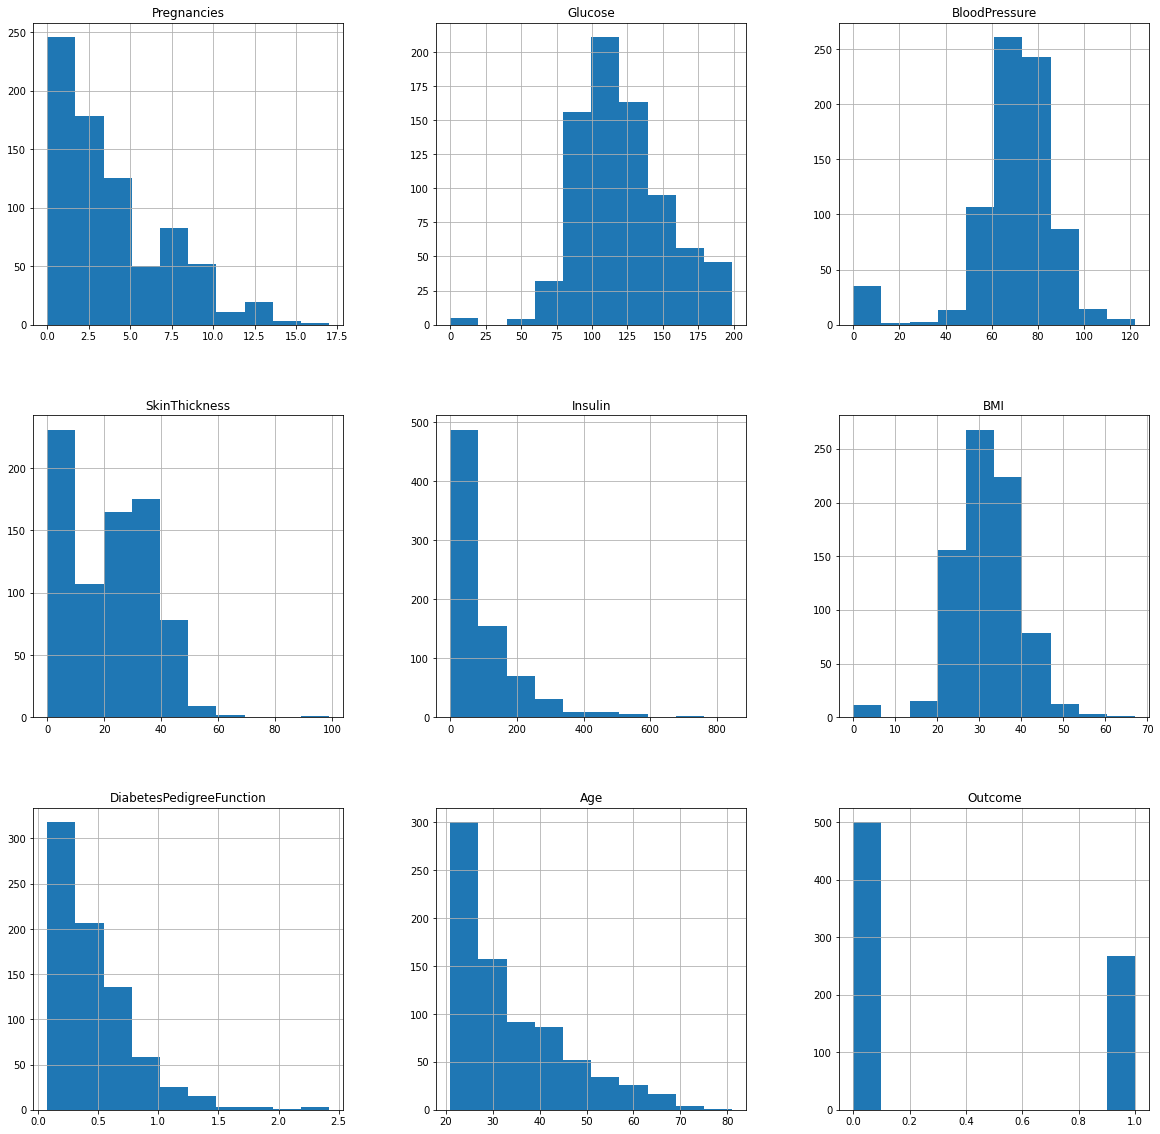

In [ ]:
p = diabetes_df.hist(figsize = (20,20))

## **Now we will be imputing the mean value of the column to each missing value of that particular column.**

In [ ]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

## **Plotting the distributions after removing the NAN values**

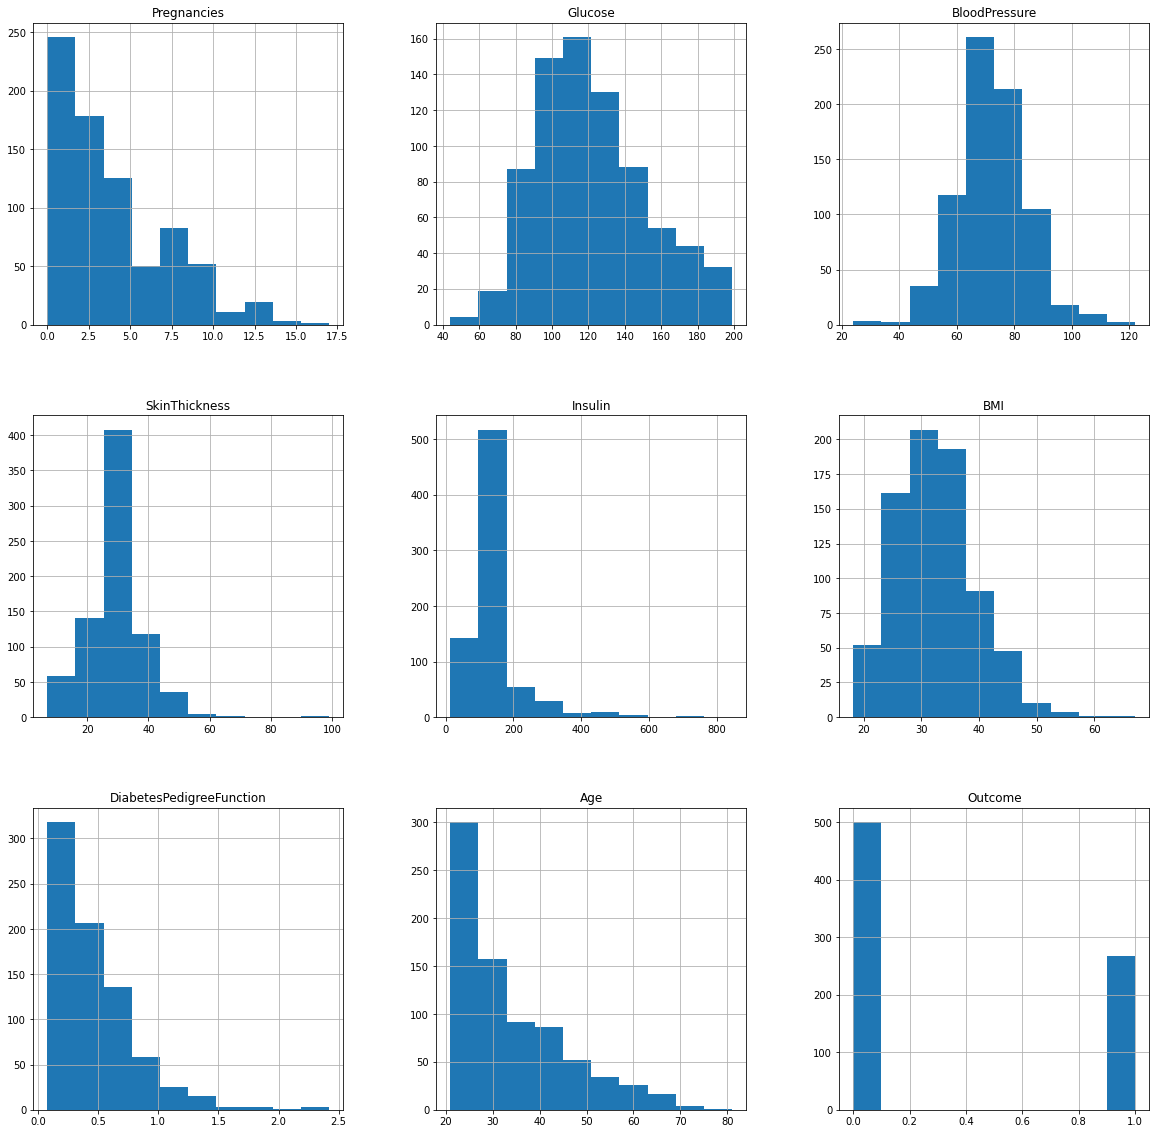

In [ ]:
p = diabetes_df_copy.hist(figsize = (20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


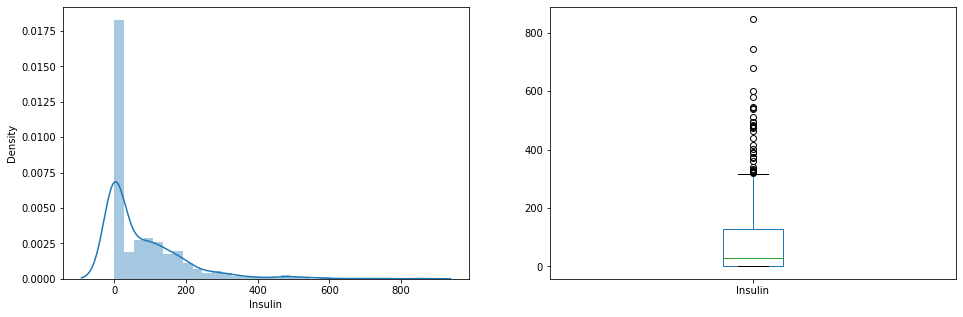

In [ ]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

## **Before scaling down the data let’s have a look into it**

In [ ]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## **After Standard scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


## **Target column**

In [ ]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## **Splitting the dataset**

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

## **Now we will split the data into training and testing data using the train_test_split function**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)

## **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7795275590551181


## **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7007874015748031


## **KNN**

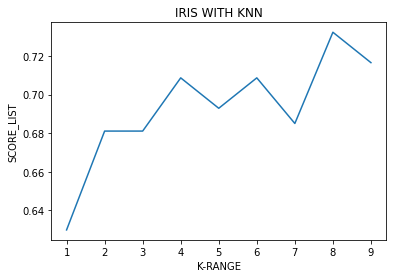

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for i in range(1,10):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(range(1,10), score_list)
plt.title("IRIS WITH KNN")
plt.xlabel("K-RANGE")
plt.ylabel("SCORE_LIST")
plt.show()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy Score = 0.6929133858267716


## **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy Score = 0.7440944881889764


## **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

regressor=LogisticRegression(random_state=0)
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy Score = 0.7874015748031497


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **Prediction of Obesity**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ObesityDataSet_raw_and_data_sinthetic.arff to ObesityDataSet_raw_and_data_sinthetic (1).arff
User uploaded file "ObesityDataSet_raw_and_data_sinthetic.arff" with length 265067 bytes


## **Importing the dataset**

In [ ]:
from scipy.io import arff

obe_df=arff.loadarff('/content/ObesityDataSet_raw_and_data_sinthetic.arff')
data=pd.DataFrame(obe_df[0])
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,b'Female',21.000000,1.620000,64.000000,b'yes',b'no',2.0,3.0,b'Sometimes',b'no',2.000000,b'no',0.000000,1.000000,b'no',b'Public_Transportation',b'Normal_Weight'
1,b'Female',21.000000,1.520000,56.000000,b'yes',b'no',3.0,3.0,b'Sometimes',b'yes',3.000000,b'yes',3.000000,0.000000,b'Sometimes',b'Public_Transportation',b'Normal_Weight'
2,b'Male',23.000000,1.800000,77.000000,b'yes',b'no',2.0,3.0,b'Sometimes',b'no',2.000000,b'no',2.000000,1.000000,b'Frequently',b'Public_Transportation',b'Normal_Weight'
3,b'Male',27.000000,1.800000,87.000000,b'no',b'no',3.0,3.0,b'Sometimes',b'no',2.000000,b'no',2.000000,0.000000,b'Frequently',b'Walking',b'Overweight_Level_I'
4,b'Male',22.000000,1.780000,89.800000,b'no',b'no',2.0,1.0,b'Sometimes',b'no',2.000000,b'no',0.000000,0.000000,b'Sometimes',b'Public_Transportation',b'Overweight_Level_II'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,b'Female',20.976842,1.710730,131.408528,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',1.728139,b'no',1.676269,0.906247,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2107,b'Female',21.982942,1.748584,133.742943,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.005130,b'no',1.341390,0.599270,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2108,b'Female',22.524036,1.752206,133.689352,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.054193,b'no',1.414209,0.646288,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2109,b'Female',24.361936,1.739450,133.346641,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.852339,b'no',1.139107,0.586035,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'


## **Pre-processing of the dataset**

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight']= label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC']= label_encoder.fit_transform(data['FAVC'])
data['CAEC']= label_encoder.fit_transform(data['CAEC'])
data['SMOKE']= label_encoder.fit_transform(data['SMOKE'])
data['SCC']= label_encoder.fit_transform(data['SCC'])
data['CALC']= label_encoder.fit_transform(data['CALC'])
data['MTRANS']= label_encoder.fit_transform(data['MTRANS'])
data['NObeyesdad']= label_encoder.fit_transform(data['NObeyesdad'])

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


## **Check shape and Values**

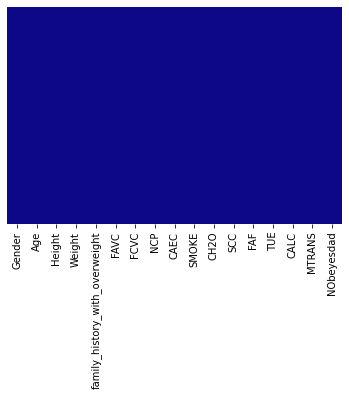

In [ ]:
# Returns the array dimensions
data.shape

#Check if there are any missing values
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='plasma')

## **Correlation**

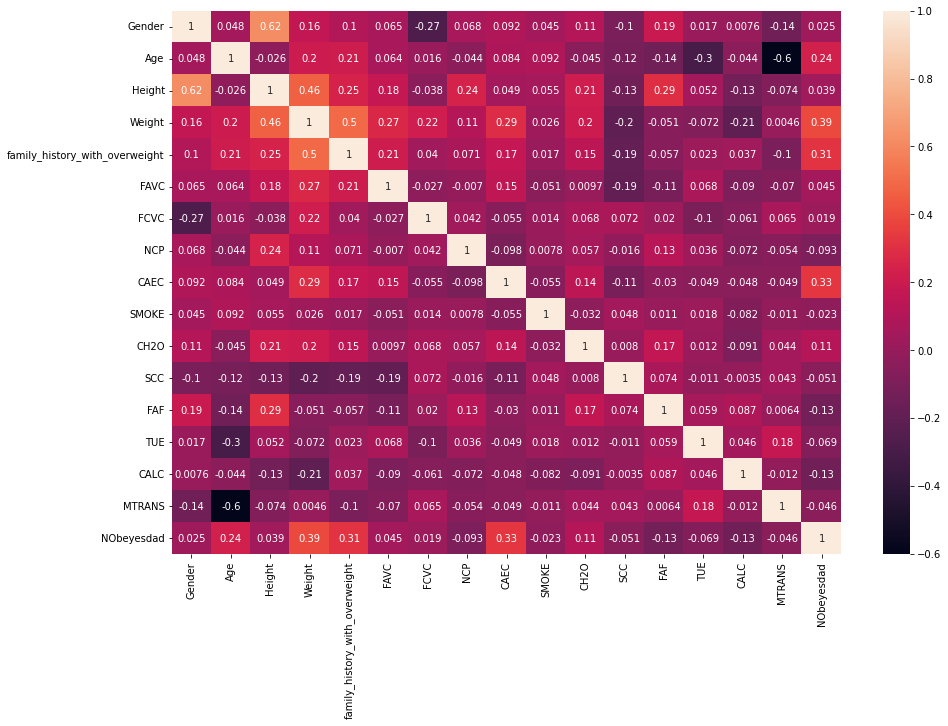

In [ ]:
#Correlation matrix
data.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

## **Drop variables**

In [ ]:
#Drop the weight variable
data.drop(['Weight'],axis = 1, inplace = True)
y=data['NObeyesdad']
data.drop(['NObeyesdad'], axis=1, inplace=True)

In [ ]:
#Return columns
print(data.keys(), "\n")

#Return array dimensions
print(data.shape, "\n")

#Dataframe summary
data.info()

#Summarize  central tendency, dispersion, and shape of a dataset’s distribution
data.describe()

Index(['Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS'],
      dtype='object') 

(2111, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int64  
 4   FAVC                            2111 non-null   int64  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   int64  
 8   SMOKE                           2111 non-null   int64  
 9   CH2O      

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230
std,0.500083,6.345968,0.093305,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423
min,0.000000,14.000000,1.450000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000
50%,1.000000,22.777890,1.700499,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000
75%,1.000000,26.000000,1.768464,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


## **Count Plotting**

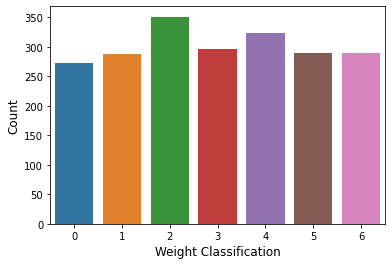

In [ ]:
#Distribution of the target variable via countplot
sns.countplot(x=y, data=data)
plt.xlabel("Weight Classification", size=12)
plt.ylabel("Count", size=12)
plt.show()

## **Normalizing the data**

In [ ]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(data)
cols = ['Gender', 'Age', 'Height', 'family_history','FCHCF','FCV','NMM','CFBM','Smoke','CW','CCM', 'PAF','TUT','CA','Transportation']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

   Gender       Age    Height  ...  TUT        CA  Transportation
0     0.0  0.148936  0.320755  ...  0.5  1.000000            0.75
1     0.0  0.148936  0.132075  ...  0.0  0.666667            0.75
2     1.0  0.191489  0.660377  ...  0.5  0.333333            0.75
3     1.0  0.276596  0.660377  ...  0.0  0.333333            1.00
4     1.0  0.170213  0.622642  ...  0.0  0.666667            0.75

[5 rows x 15 columns]


In [ ]:
#Store the feature and target variable
X = normalizedData.iloc[:, :-1]
y=y.values

print(normalizedData.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2111, 15)
(2111, 14)
(2111,)
(1477, 14)
(634, 14)
(1477,)
(634,)


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy of predictions:", metrics.accuracy_score(y_test, y_pred))

Accuracy of predictions: 0.5599369085173501


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7444794952681388


## **KNN**

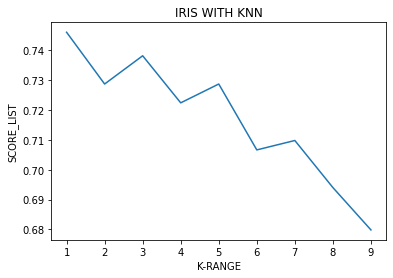

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for i in range(1,10):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(range(1,10), score_list)
plt.title("IRIS WITH KNN")
plt.xlabel("K-RANGE")
plt.ylabel("SCORE_LIST")
plt.show()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy Score = 0.7097791798107256


## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy Score = 0.5362776025236593


## **DIABETES DETECTION USING RANDOM FOREST HAVING HIGHEST ACCURACY AMONG ALL**

In [ ]:
predict_class=rfc.predict(sc_X.fit_transform(np.array([[6,148,72,35,0,33.6,0.627,50]]))).reshape(-1,1)[0][0]
if(predict_class==0):
  print("Non-diabetic")
else:
  print("Diabetic")

Non-diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## **OBESITY DETECTION USING DECISION TREE HAVING HIGHEST ACCURACY AMONG ALL**

In [ ]:
predict_class2=dtree.predict(scaler.fit_transform(np.array([[0,21.0,1.62,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3]]))).reshape(-1,1)[0]
if(predict_class2>=0 and predict_class2<=2):
  print("Not Obese")
elif(predict_class2==3 or predict_class2==4):
  print('Medium Obese')
else:
  print("High Obese")

Not Obese


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
